In [4]:
# !pip install transformers
# !pip install datasets
# !pip install nltk

In [1]:
import nltk
# nltk.download('punkt')
from google.colab import drive
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import re
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from datasets import get_dataset_config_names
from datasets import load_dataset

In [3]:
georgian_oscar = load_dataset("oscar", "unshuffled_original_ka", split="train")

In [ ]:
text = georgian_oscar['text']

In [ ]:
len(text)

563916

In [ ]:
text[563712]

'ინდოეთის დედაქალაქ ნიუ-დელიში ჰაერის დაბინძურების მაჩვენებელმა ჯანდაცვის მსოფლიო ორგანიზაციის მიერ დაშვებულ ნორმას 20-ჯერ გადააჭარბა. ნაცრისფერი სმოგის გამო ქალაქში საგრძნობლადაა შემცირებული ხილვადობაც\nრა განწყობაა სალომე ზურაბიშვილის შტაბში რა შედეგებზე საუბრობენ ისინი და როგორ აფასებენ ეგისონ რისერჩის ეკზიტპოლის მონაცემებს\nინდინაპოლისის ზოოპარკში ძუ ლომმა თავისი 3 ბოკვერის მამა ლომი მოკლა. სპეციალისტები თავდახმის მიზეზის დადგენას ცდილობენ\n„ჩვენ 28 ოქტომბერს არჩევნები მოგებული გვაქვს, რა ყალბი ციფრებიც არ უნდა აქვეყნოს &quot;ქართულმა ოცნებამ&quot; - გრიგოლ ვაშაძე\nმანქანებით გადატვირთულ გზაზე დაბნეულ ძაღლს ყველა გვერდს უვლიდა... მხოლოდ ავტობუსის მძღოლმა გააჩერა მგზავრებით სავსე ტრანსპორტი\n‘’ვინც იდგა იქ, ცოცხლებიც და დაღუპულებიც, არიან გმირები და ის ადგილი არის წმინდა ადგილი’’ - ამირან სალუქვაძე\nყველამ უნდა იგრძნოს დისკომფორტი და 9 აპრილის გმირების სისხლით მორწყლი მიწა როგორ უნდა ერგოს მეჩითოვს და ზურაბიშვილს - ვახტანგ ბერიძე\nსაარჩევნო კოდექსით არის დარეგულირებული, რომ უცხო ქვე

In [ ]:
from nltk import sent_tokenize
all_sentences = []
for txt in text:
  txt = txt.split('\n')
  tokenized_text = []
  for sentence in txt:
    tokenized_text += sent_tokenize(sentence)
  all_sentences += tokenized_text
len(all_sentences)

11511987

In [ ]:
all_sentences[0]

'წამიყვანე შენთან ერთად (ქართულად) / Возьми меня с собой (картулад) / (რუსული სერიალები ქართულად) (რუსების პორნო ონლაინში) (rusebis porno) რუსული სერიალები ფილმები ქართულად ონლაინში / turquli serialebi'

In [ ]:
text[0]

'წამიყვანე შენთან ერთად (ქართულად) / Возьми меня с собой (картулад) / (რუსული სერიალები ქართულად) (რუსების პორნო ონლაინში) (rusebis porno) რუსული სერიალები ფილმები ქართულად ონლაინში / turquli serialebi\nწამიყვანე შენთან ერთად (ქართულად) / Возьми меня с собой (картулад) / (რუსული სერიალები ქართულად) (რუსების პორნო ონლაინში) (rusebis porno)\nმოკლე აღწერა:როგორც ჩანს, 3 სკოლის მეგობარ, როგორც ჩანს, არასოდეს ნაწილი. ყველა მათგანს სურს ბედნიერება ცხოვრებაში, რომელიც მათ ოცნებობდნენ ბავშვობიდან. მაგრამ დრო გადის და თითოეული მათგანი სხვადასხვა გზით ცხოვრობს. რიტა აქვს დიდი რაოდენობით მოყვარულებს, მან არ იცის განცდა მარტოობა,'

In [2]:
df = pd.DataFrame({"Sentence": all_sentences})
df.to_csv("/content/drive/MyDrive/GeorgianLanguageModel/sentences_unfiltered.csv", index=False)

NameError: ignored

In [3]:
all_sentences_df = pd.read_csv('/content/drive/MyDrive/GeorgianLanguageModel/sentences_unfiltered.csv', lineterminator='\n')
all_sentences_df.head()

,Sentence
0,წამიყვანე შენთან ერთად (ქართულად) / Возьми мен...
1,წამიყვანე შენთან ერთად (ქართულად) / Возьми мен...
2,"მოკლე აღწერა:როგორც ჩანს, 3 სკოლის მეგობარ, რო..."
3,"ყველა მათგანს სურს ბედნიერება ცხოვრებაში, რომე..."
4,მაგრამ დრო გადის და თითოეული მათგანი სხვადასხვ...


In [4]:
all_sentences = all_sentences_df["Sentence"].values
all_sentences = list(all_sentences)
print(type(all_sentences))

<class 'list'>


In [5]:
not_strs = []
for sentence in all_sentences:
  a = type(sentence)
  if str(a) != '<class \'str\'>':
    not_strs.append(sentence)

print(not_strs)

for sentence in not_strs:
  all_sentences.remove(sentence)

[nan]


In [6]:
len(all_sentences)

11511986

In [39]:

all_sentences[127]

'მთის განვითარების ფონდის და ახალციხის მუნიციპალიტეტის მერიის დაფინანსებით ახალციხეში, სოფელ ურაველში გზის ნაწილი მოასფალტდება.'

In [6]:
import re

pattern = '[^ ]*[^აბგდევზთიკლმნოპჟრსტუფქღყშჩცძწჭხჯჰ0123456789 ]+[^ ]*'
new_sentences = []
def clean(x):
  x = re.sub('#\S+', '', x)  # remove hashtags
  x = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>@[\]^_`{|}~"""), ' ', x)  # remove punctuations
  x = re.sub('\s+', ' ', x) # remove extra spaces
  x = re.sub(pattern, "", x) # remove non only georgian letters
  return x
for i in range(len(all_sentences)): 
  if i % 1000000 == 0:
    print(i)
  new_sentences.append(clean(all_sentences[i]))


0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000


In [14]:
new_sentences[0]

'წამიყვანე შენთან ერთად ქართულად      რუსული სერიალები ქართულად რუსების პორნო ონლაინში   რუსული სერიალები ფილმები ქართულად ონლაინში  '

In [15]:
df = pd.DataFrame({"Sentence": new_sentences})
df.to_csv("/content/drive/MyDrive/GeorgianLanguageModel/cleaned_sentences.csv", index=False)

In [2]:
all_sentences_df = pd.read_csv("/content/drive/MyDrive/GeorgianLanguageModel/cleaned_sentences.csv")
all_sentences_df.head()

,Sentence
0,წამიყვანე შენთან ერთად ქართულად რუსული სე...
1,წამიყვანე შენთან ერთად ქართულად რუსული სე...
2,მოკლე აღწერა როგორც ჩანს 3 სკოლის მეგობარ როგო...
3,ყველა მათგანს სურს ბედნიერება ცხოვრებაში რომელ...
4,მაგრამ დრო გადის და თითოეული მათგანი სხვადასხვ...


In [3]:
all_sentences = all_sentences_df["Sentence"].values
all_sentences = list(all_sentences)
all_sentences = list(filter(lambda x: type(x) == str,all_sentences))

In [17]:
sentence_length = list(map(lambda x: len(x.split()),all_sentences))

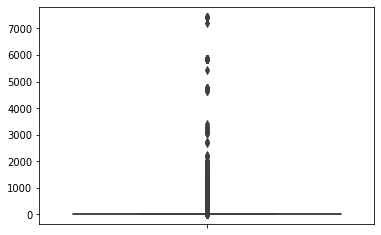

In [18]:
sns.boxplot(y = sentence_length)
plt.show()

In [7]:
def get_margins(y):
    upper_quartile = np.percentile(y, 75)
    lower_quartile = np.percentile(y, 25)

    iqr = upper_quartile - lower_quartile
    upper_whisker = y[y<=upper_quartile+1.5*iqr].max()
    lower_whisker = y[y>=lower_quartile-1.5*iqr].min()
    return upper_whisker,lower_whisker,len(y[y>upper_whisker]),len(y[y<lower_whisker])
def print_margins(a,b,c,d):
    print("\nUpper bound: ",a,"\nLower bound: ",b,"\nNumber of above Outliers: ",c,"\nNumber of below Outliers:",d)

In [20]:
index_bounds,value_bounds = get_margins(np.array(sentence_length)),get_margins(np.array(sentence_length))
print("Quantity information")
print_margins(index_bounds[0],index_bounds[1],index_bounds[2],index_bounds[3])
print("\nValue information")
print_margins(value_bounds[0],value_bounds[1],value_bounds[2],value_bounds[3])

Quantity information

Upper bound:  33 
Lower bound:  1 
Number of above Outliers:  504320 
Number of below Outliers: 0

Value information

Upper bound:  33 
Lower bound:  1 
Number of above Outliers:  504320 
Number of below Outliers: 0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


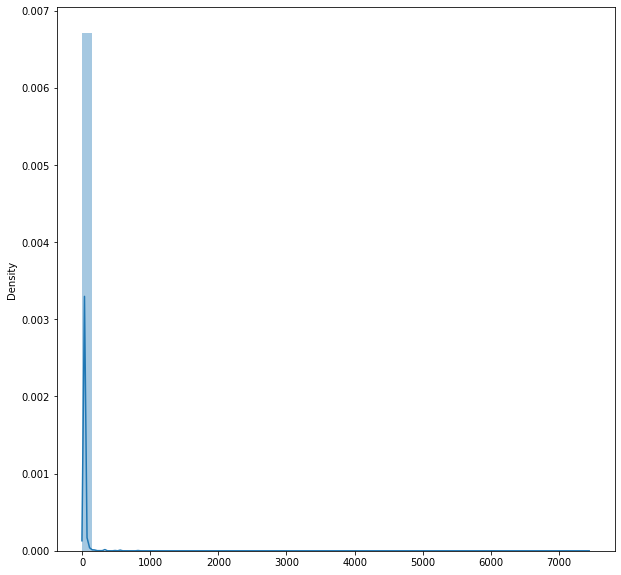

In [21]:
plt.figure(figsize=(10,10))
sns.distplot(sentence_length)
plt.show()

In [4]:
word_length = list(map(lambda x: [len(y) for y in x.split()],all_sentences))

In [5]:
flat_list = list(itertools.chain(*word_length))

In [6]:
len(flat_list) 

161600874

In [8]:
index_bounds,value_bounds = get_margins(np.array(flat_list)),get_margins(np.array(flat_list))
print("Quantity information")
print_margins(index_bounds[0],index_bounds[1],index_bounds[2],index_bounds[3])
print("\nValue information")
print_margins(value_bounds[0],value_bounds[1],value_bounds[2],value_bounds[3])

Quantity information

Upper bound:  16 
Lower bound:  1 
Number of above Outliers:  988058 
Number of below Outliers: 0

Value information

Upper bound:  16 
Lower bound:  1 
Number of above Outliers:  988058 
Number of below Outliers: 0


In [9]:
Counter(flat_list)

Counter({1: 3545082,
         2: 15585495,
         3: 7748880,
         4: 13849053,
         5: 14500064,
         6: 17305368,
         7: 18253932,
         8: 17711760,
         9: 15370712,
         10: 12616823,
         11: 9809304,
         12: 6701230,
         13: 3540695,
         14: 2065788,
         15: 1355441,
         16: 653189,
         17: 334616,
         18: 167514,
         19: 122840,
         20: 74155,
         21: 82537,
         22: 41283,
         23: 18116,
         24: 14336,
         25: 16140,
         26: 9712,
         27: 6940,
         28: 3681,
         29: 4421,
         30: 6215,
         31: 1499,
         32: 1407,
         33: 2290,
         34: 1637,
         35: 1548,
         36: 1209,
         37: 5013,
         38: 1558,
         39: 2024,
         40: 1406,
         41: 2778,
         42: 2747,
         43: 1741,
         44: 3276,
         45: 1708,
         46: 234,
         47: 264,
         48: 802,
         49: 2181,
         50: 4

In [11]:
long_word_pattern = '[^ ]{26,9999}'
j = 0
for i in range(len(all_sentences)):
  if i % 1000000 == 0 :
    print(i)
  pre = all_sentences[i]
  all_sentences[i] = re.sub(long_word_pattern,"",all_sentences[i])
  if pre != all_sentences[i]:
    j+=1

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000


In [12]:
j,len(all_sentences)

(41100, 11357545)

In [13]:
word_length = list(map(lambda x: [len(y) for y in x.split()],all_sentences))

In [14]:
flat_list = list(itertools.chain(*word_length))

In [15]:
len(flat_list)

161484353

In [16]:
Counter(flat_list)

Counter({1: 3545082,
         2: 15585495,
         3: 7748880,
         4: 13849053,
         5: 14500064,
         6: 17305368,
         7: 18253932,
         8: 17711760,
         9: 15370712,
         10: 12616823,
         11: 9809304,
         12: 6701230,
         13: 3540695,
         14: 2065788,
         15: 1355441,
         16: 653189,
         17: 334616,
         18: 167514,
         19: 122840,
         20: 74155,
         21: 82537,
         22: 41283,
         23: 18116,
         24: 14336,
         25: 16140})

In [17]:
df = pd.DataFrame({"Sentence": all_sentences})
df.to_csv("/content/drive/MyDrive/GeorgianLanguageModel/more_cleaned_sentences.csv", index=False)

In [2]:
all_sentences_df = pd.read_csv("/content/drive/MyDrive/GeorgianLanguageModel/more_cleaned_sentences.csv")
all_sentences_df.head()

,Sentence
0,წამიყვანე შენთან ერთად ქართულად რუსული სერიალე...
1,წამიყვანე შენთან ერთად ქართულად რუსული სერიალე...
2,მოკლე აღწერა როგორც ჩანს 3 სკოლის მეგობარ როგო...
3,ყველა მათგანს სურს ბედნიერება ცხოვრებაში რომელ...
4,მაგრამ დრო გადის და თითოეული მათგანი სხვადასხვ...


In [18]:
# all_sentences = all_sentences_df["Sentence"].values
# all_sentences = list(all_sentences)
# all_sentences = list(filter(lambda x: type(x) == str,all_sentences))
def filter_func(x):
  l = len(x.split())
  return l >=5 and l <=500
print(len(all_sentences))
all_sentences = list(filter(filter_func,all_sentences))
print(len(all_sentences))

11357545
9961319


In [19]:
df = pd.DataFrame({"Sentence": all_sentences})
df.to_csv("/content/drive/MyDrive/GeorgianLanguageModel/filtered_sentences.csv", index=False)

In [7]:
words = {}
for i,sent in enumerate(new_sentences):
  if i % 1000000==0:
    print(i)
  for word in sent.split():
    if word in words.keys():
      words[word] +=1
    else:
      words[word] = 1

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000


In [8]:
len(words)

1976622

In [9]:
words= list(sorted(words.items(), key=lambda item: item[1])) 

In [10]:
words[-25:]

[('სხვა', 311051),
 ('ერთი', 313265),
 ('რაც', 314551),
 ('მიერ', 315559),
 ('როგორც', 336679),
 ('2', 343380),
 ('მისი', 352678),
 ('მაგრამ', 367394),
 ('1', 376658),
 ('იყო', 423172),
 ('კი', 436576),
 ('ან', 490249),
 ('წლის', 498360),
 ('ქ', 506245),
 ('რომელიც', 514199),
 ('უნდა', 516142),
 ('არის', 562010),
 ('თუ', 600079),
 ('ის', 639484),
 ('ეს', 677574),
 ('საქართველოს', 689849),
 ('ამ', 713347),
 ('არ', 1306852),
 ('რომ', 1446699),
 ('და', 6160351)]

In [11]:
chars = {}
for word in words:
  word_ = word[0]
  for ch in word_:
    if ch in chars.keys():
      chars[ch]+=1
    else:
      chars[ch] = 1

In [12]:
sorted_chars= list(sorted(chars.items(), key=lambda item: item[1])) 

In [13]:
sorted_chars

[('6', 16763),
 ('8', 16781),
 ('7', 19772),
 ('ჟ', 20300),
 ('4', 20993),
 ('3', 21376),
 ('9', 23029),
 ('2', 26129),
 ('5', 27546),
 ('1', 31894),
 ('0', 34568),
 ('ჭ', 36401),
 ('ჰ', 47095),
 ('ჯ', 54234),
 ('ძ', 72320),
 ('ღ', 80611),
 ('ჩ', 97490),
 ('ყ', 102380),
 ('წ', 132823),
 ('ქ', 158055),
 ('ფ', 163832),
 ('პ', 177703),
 ('ზ', 196429),
 ('ხ', 226896),
 ('ც', 265065),
 ('შ', 273892),
 ('კ', 363821),
 ('ტ', 442098),
 ('გ', 487274),
 ('თ', 511396),
 ('უ', 586003),
 ('დ', 693272),
 ('ვ', 694653),
 ('ლ', 821854),
 ('ბ', 846055),
 ('მ', 875075),
 ('ნ', 984662),
 ('ო', 1041996),
 ('რ', 1056997),
 ('ს', 1222632),
 ('ე', 1803297),
 ('ი', 2228885),
 ('ა', 2775397)]